# Python's and NumPy's in-place operator functions

# Introduction

First, we have to briefly talk about how the operators, e.g., for "addition" are implemented in Python.  
There are basically two different `add` methods for the `+` operator:

- `a.__add__(b)`
Returns the sum of `a` and `b` in `a + b`

- `a.__iadd__(b)`  
Changes the value `a` in place, e.g., `a += b`

However, the `__iadd__` method supports only mutable types. Thus, if we use the in-place operator `+=` on, for example, integers (integers are immutable), Python simulates the `__iadd__` method:

`a += b`  
via  
`tmp = a + b; a = tmp`

### `__add__` and `__iadd__` examples

The examples below show that the **`__add__`** method **returns** the sum,  whereas the **`__iadd__`** method **modifies in-place**.

In [1]:
a = 1
b = 2

print(a.__add__(b))
print(a)

3
1


In [2]:
a = [1]
b = [2]

print(a.__add__(b))
print(a)

[1, 2]
[1]


In [3]:
a = [1]
b = [2]

print(a.__iadd__(b))
print(a)

[1, 2]
[1, 2]


### The advantage of `__iadd__` for mutable objects

The advantage of the `__iadd__` method is that it doesn't create a "temporary" object when we use the `+=`-in-place operator on mutable objects, such as Python `list` objects, which leads to a significant performance increase. This also works for NumPy arrays as we will see in the benchmarks below.

# `timeit` benchmarks

In [4]:
import numpy as np
import timeit

py_int, py_list, np_ary = [[],[]], [[],[]], [[],[]]

for i in range(100, 1100, 100):

    a = i
    b = i
    py_int[0].append(min(timeit.Timer('a = a + b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))

    a = i
    py_int[1].append(min(timeit.Timer('a += b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))
    
    a = np.ones((i,i))
    np_ary[0].append(min(timeit.Timer('a = a + b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))

    a = np.ones((i,i))
    np_ary[1].append(min(timeit.Timer('a += b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))
    
    a = list(range(i))
    b = list(range(i))
    py_list[0].append(min(timeit.Timer('a = a + b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))

    a = list(range(i))
    py_list[1].append(min(timeit.Timer('a += b', 
            'from __main__ import a, b').repeat(repeat=3, number=1000)))

## Preparing to plot the results

In [5]:
import platform
import multiprocessing

def print_sysinfo():
    
    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())
    
    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', multiprocessing.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

def plot():

    data = [py_int, py_list, np_ary]
    colors = ['g', 'b']
    x_vals = range(100, 1100, 100)

    f, ax = plt.subplots(1, 3, figsize=(15,5))

    for i in range(3):
        for j in range(2):
            ax[i].plot(x_vals, data[i][j], alpha=0.4, lw=3)
        ax[i].set_ylim([0, max(data[i][0][-1], data[i][1][-1])*1.5])
        ax[i].set_ylabel('time in milliseconds')    
        ax[i].set_xlabel('sample size N') 
        ax[i].legend(['a = a + x', 'a += x'])
        

    ax[0].set_title('Python integer addition\n(where a and x are integers size N)')
    ax[1].set_title('Addition Python list objects\n'\
                    '(where a and x are lists w. length N)')
    ax[2].set_title('NumPy: In-place operator for element-wise'\
                    'array operation\n(where a is a NxN-dim.NumPy array, x an integer size N)')
    
    plt.tight_layout()
    plt.show()

<br>
<br>

# Results

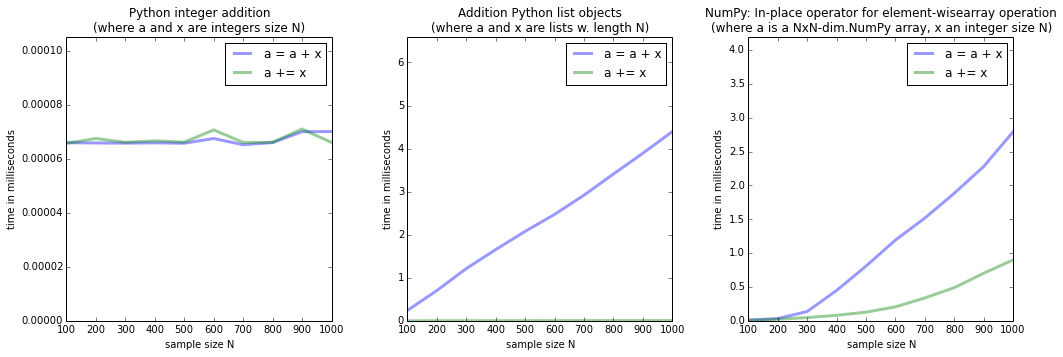


Python version  : 3.4.1
compiler        : GCC 4.2.1 (Apple Inc. build 5577)

system     : Darwin
release    : 13.2.0
machine    : x86_64
processor  : i386
CPU count  : 4
interpreter: 64bit





In [8]:
plot()
print_sysinfo()

# Conclusion

Since the `+=` in-place operator function on immutable objects (here: integers) is merely a workaround using the `__add__` method (`tmp = a + b; a = tmp`) as mentioned in the introduction above, we don't see any performance increase for Python `integer` types if we use the in-place operator: It is just syntactic sugar.  
However, it really pays off performance-wise if we use the in-place operator with on mutable types.

# References

- https://nbviewer.org/github/rasbt/One-Python-benchmark-per-day/blob/master/ipython_nbs/day14_inplace_operators.ipynb